## data preprocess


In [ ]:
from __future__ import print_function
import keras
from keras.models import *
from keras.layers import *
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import os
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import applications
from tqdm import tqdm
from keras.models import load_model
import random
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import cv2;
import matplotlib.pyplot as plt
import numpy as np;
from random import shuffle;
import cv2;
from random import shuffle;
from tqdm import tqdm;
import tensorflow;
from tensorflow.keras import layers;
from tensorflow.keras import Model;
from tensorflow.keras.optimizers import SGD;
from tensorflow.keras.callbacks import TensorBoard;
IMAGE_SIZE = 75;


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Run this block once till session crashes. It will turn your session into HIGH-RAM Mode
a = []
while (1):
  a.append(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path_to_file = '/content/drive/My Drive/FDS/utkface-new.zip'
path_to_dir = '/content/drive/My Drive/FDS/'
path_to_data = '/content/drive/My Drive/FDS/utkface/UTKFace/'

In [ ]:
face_data = os.listdir(path_to_data)

FileNotFoundError: ignored

In [ ]:
random.shuffle(face_data)
label0 = [i.split('_')[0] for i in face_data]
label1 = [i.split('_')[1] for i in face_data]

NameError: ignored

We can split the data into Classes

1.   Children (1-14) CLASS 0
2.   Youth (14-25) CLASS 1
3.   ADULTS (25-40) CLASS 2
4.   Middle age (40-60) CLASS 3
5.   Very Old (60-80) CLASS 4
6.   Extreme Old (>80) CLASS 5

In [ ]:
gen = []
for i in label1:
    i = int(i)
    gen.append(i)

age = []
for i in label0:
    i = int(i)
    if i <= 14:
        age.append(0)
    if (i>14) and (i<=25):
        age.append(1)
    if (i>25) and (i<40):
        age.append(2)
    if (i>=40) and (i<60):
        age.append(3)
    if (i>=60) and (i<80):
        age.append(4)
    if i>=80:
        age.append(5)

In [ ]:
data = []
for img in tqdm(face_data):
  img_read = image.load_img(path_to_data + img, target_size = (32, 32))
  img_array = img_to_array(img_read)
  img_array = img_array/255
  data.append(np.array(img_array))

100%|██████████| 23708/23708 [1:48:09<00:00,  3.65it/s]


In [ ]:
faces = np.array(data)
age = np.array(age)
gen = np.array(gen)

In [ ]:
np.save(path_to_dir + 'faces.npy', faces)
np.save(path_to_dir + 'age.npy', age)
np.save(path_to_dir + 'gen.npy', gen)

In [ ]:
faces = np.load(path_to_dir + 'faces_old.npy')
age = np.load(path_to_dir + 'age_old.npy')
gen = np.load(path_to_dir + 'gen_old.npy')

In [ ]:
x_train_img = faces[:round(0.9 * len(faces))]
x_test_img  = faces[round(0.9 * len(faces)):]

s1, s2, s3, s4 = x_train_img.shape
t1, t2, t3, t4 = x_test_img.shape
x_train_vec = x_train_img.reshape(s1, s2 * s3 * s4)
x_test_vec  = x_test_img.reshape(t1, t2 * t3 * t4)

y_train_age = age[:round(0.9 * len(age))]
y_train_gen = gen[:round(0.9 * len(age))]

y_test_age = age[round(0.9 * len(age)):]
y_test_gen = gen[round(0.9 * len(gen)):]

# EDA Age



## Data prep

In [ ]:
s1, s2, s3, s4 = x_train_img.shape
x_t = x_train_img.reshape(s1, s2*s3*s4)

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(x_t.shape[1]) ]
df = pd.DataFrame(x_t, columns=feat_cols)
df['y'] = y_train_age
df['label'] = df['y'].apply(lambda i: str(i))
#X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (21337, 3074)


In [ ]:
df.head(2)

pixel0    pixel1    pixel2    pixel3  ...  pixel3070  pixel3071  y  label
0  0.196078  0.196078  0.235294  0.215686  ...   0.639216   0.666667  3      3
1  0.337255  0.282353  0.247059  0.482353  ...   0.670588   0.596078  0      0

[2 rows x 3074 columns]

In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

## Correlation Matrix


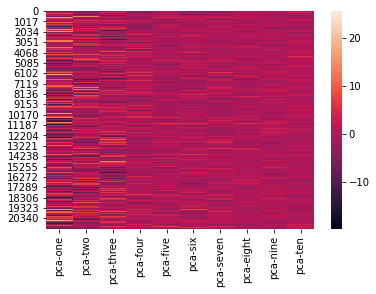

In [ ]:
heat_map = sns.heatmap(df[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five', 'pca-six', 'pca-seven', 'pca-eight', 'pca-nine', 'pca-ten']])
plt.show()

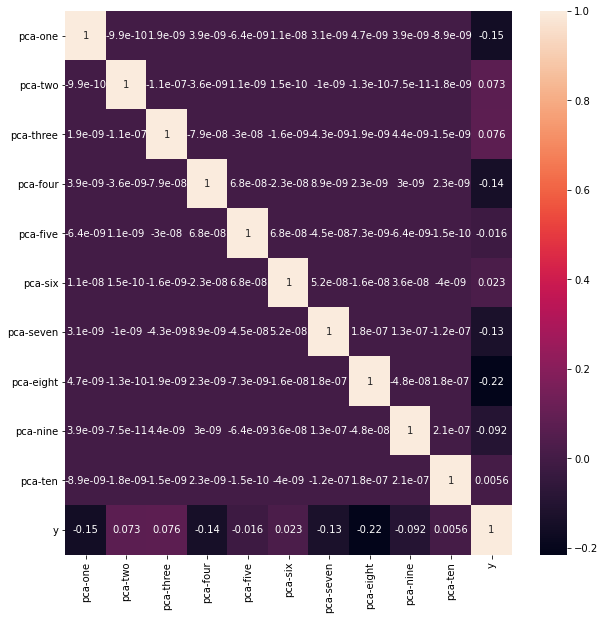

In [ ]:
corr_Mat = df[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five', 'pca-six', 'pca-seven', 'pca-eight', 'pca-nine', 'pca-ten', 'y']].corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_Mat, annot=True, ax= ax)

In [ ]:
pixels_list = list(df.columns)[:-11]
print(pixels_list)

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91

In [ ]:
corr_Mat = df[:5][pixels_list].corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_Mat, annot=True, ax= ax)

In [ ]:
df[:5][pixels_list]

pixel0    pixel1    pixel2    pixel3  ...  pixel3069  pixel3070  pixel3071  y
0  0.196078  0.196078  0.235294  0.215686  ...   0.650980   0.639216   0.666667  3
1  0.337255  0.282353  0.247059  0.482353  ...   0.447059   0.670588   0.596078  0
2  0.137255  0.141176  0.156863  0.145098  ...   0.050980   0.031373   0.015686  1
3  0.811765  0.674510  0.549020  0.764706  ...   0.580392   0.541176   0.501961  5
4  0.156863  0.109804  0.117647  0.152941  ...   0.886275   0.886275   0.878431  2

[5 rows x 3073 columns]

## Data visualization


In [ ]:

fig = plt.figure( figsize=(20,10) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1, title = "Age: {}".format(str(df.loc[i,'label'])) )
    ax.matshow(df.loc[i,feat_cols].values.reshape((32,32,3)).astype(float))

plt.show()

NameError: ignored

<Figure size 1440x720 with 0 Axes>

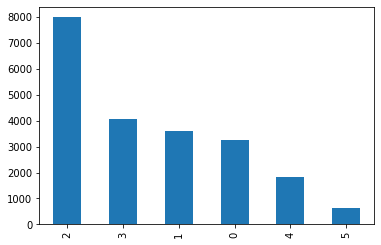

In [ ]:
df['y'].value_counts().plot(kind='bar')

## PCA

In [ ]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['pca-four'] = pca_result[:,3]
df['pca-five'] = pca_result[:,4]
df['pca-six'] = pca_result[:,5] 
df['pca-seven'] = pca_result[:,6]
df['pca-eight'] = pca_result[:,7]
df['pca-nine'] = pca_result[:,8]
df['pca-ten'] = pca_result[:,9]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.27097276 0.12019285 0.11916903 0.04229325 0.03206179 0.02708487
 0.0256621  0.01929374 0.01621551 0.01568467]


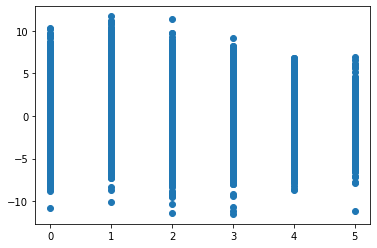

In [ ]:
plt.scatter(df['y'], df['pca-four'])

50% of variations are explained by first three PCA components. Hence these components are studied to dig out relationship between artificial pixels (PCA components).

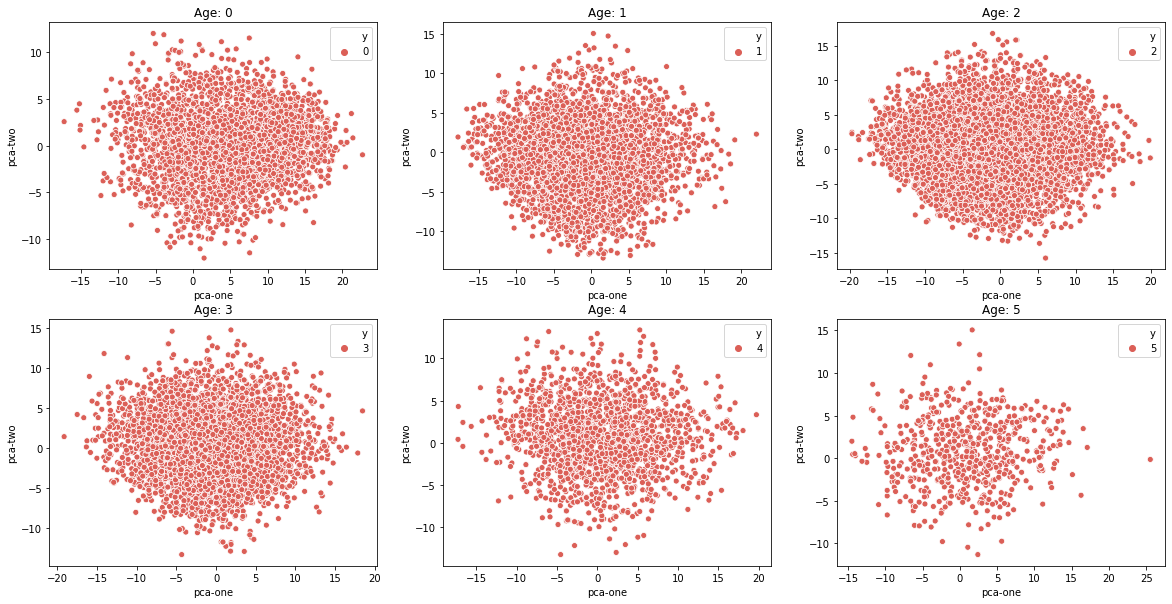

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = plt.subplot(2, 3, i+1, title = "Age: {}".format(str(i)))
    sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 1),
    data=df.loc[df[df['y']== i].index,:],
    legend="full", ax = ax)
plt.show()

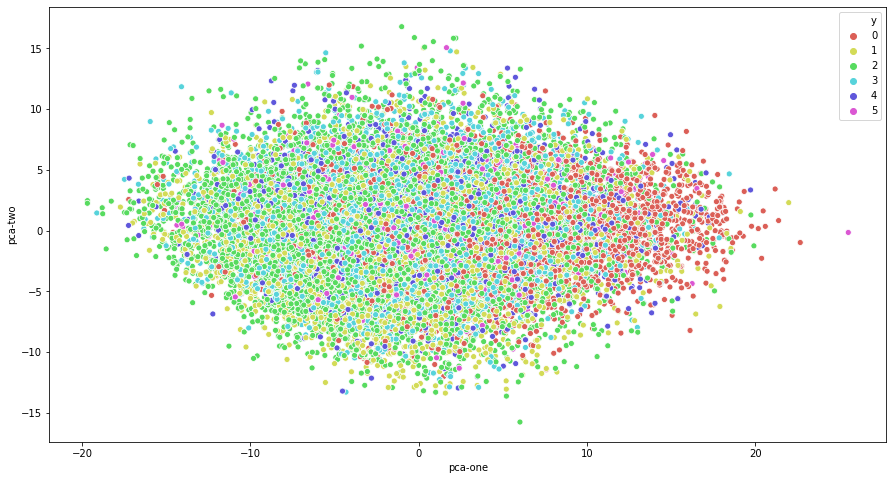

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="pca-one", y="pca-two",
                hue="y",
                palette=sns.color_palette("hls", 6),
                data=df,
                legend="full")
plt.show()

It is clearly seen that the data is densely populated and spreads evenly for all age classses. No significant insight is drawn from the visualization. 

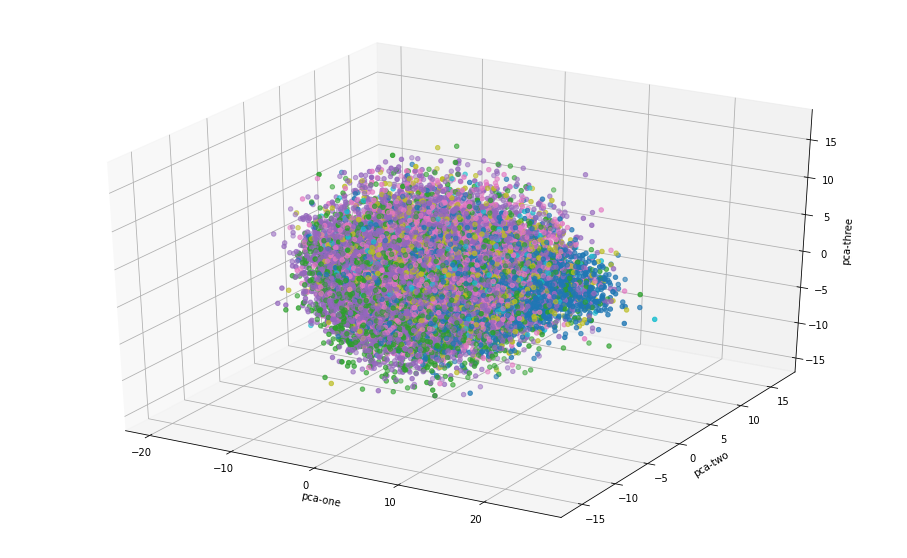

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## t-SNE with PCA



In [ ]:
df_pca_red = df[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five', 'pca-six', 'pca-seven', 'pca-eight', 'pca-nine', 'pca-ten', 'y']]
df_pca_red

In [ ]:
N = 1000
df_pca_subset = df_pca_red.loc[:N]
data_pca_subset = df_pca_subset[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five', 'pca-six', 'pca-seven', 'pca-eight', 'pca-nine', 'pca-ten']].values

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [ ]:
time_start = time.time()
tsne_pca = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=600)
tsne_pca_results = tsne.fit_transform(data_pca_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1001 samples in 0.001s...
[t-SNE] Computed neighbors for 1001 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1001
[t-SNE] Computed conditional probabilities for sample 1001 / 1001
[t-SNE] Mean sigma: 3.259691
[t-SNE] Computed conditional probabilities in 0.074s
[t-SNE] Iteration 50: error = 67.4884109, gradient norm = 0.2721629 (50 iterations in 0.340s)
[t-SNE] Iteration 100: error = 66.4223328, gradient norm = 0.2764778 (50 iterations in 0.320s)
[t-SNE] Iteration 150: error = 66.5129395, gradient norm = 0.2661167 (50 iterations in 0.335s)
[t-SNE] Iteration 200: error = 66.7270126, gradient norm = 0.2681349 (50 iterations in 0.319s)
[t-SNE] Iteration 250: error = 66.1417694, gradient norm = 0.2830309 (50 iterations in 0.322s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.141769
[t-SNE] Iteration 300: error = 1.4176658, gradient norm = 0.0011474 (50 iterations in 0.249s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


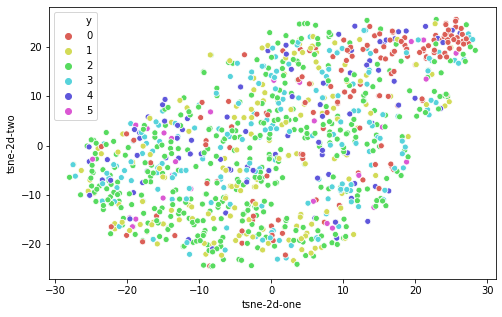

In [ ]:
df_pca_subset['tsne-2d-one'] = tsne_pca_results[:,0]
df_pca_subset['tsne-2d-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_pca_subset,
    legend="full"
)

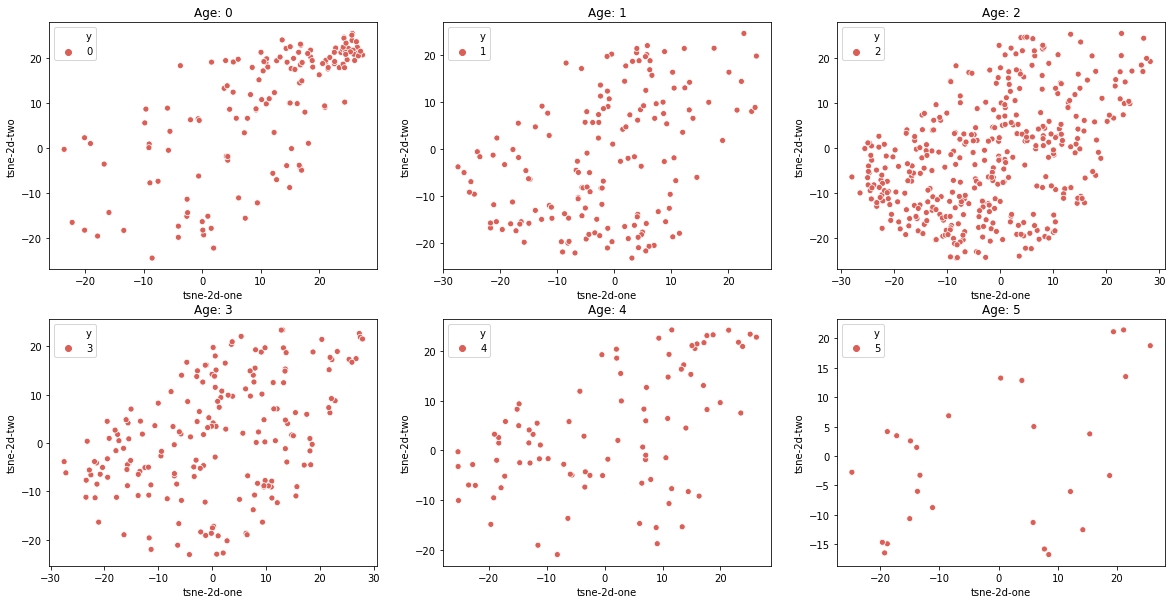

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = plt.subplot(2, 3, i+1, title = "Age: {}".format(str(i)))
    sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 1),
    data=df_pca_subset[df_pca_subset['y'] == i],
    legend="full")
plt.show()

## t-SNE without PCA




In [ ]:
N = 1000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.26883218 0.12693566 0.11406696]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=600)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.271s...
[t-SNE] Computed neighbors for 1000 samples in 7.764s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.517180
[t-SNE] Computed conditional probabilities in 0.086s
[t-SNE] Iteration 50: error = 75.2983780, gradient norm = 0.3224402 (50 iterations in 0.375s)
[t-SNE] Iteration 100: error = 76.8662109, gradient norm = 0.2958983 (50 iterations in 0.360s)
[t-SNE] Iteration 150: error = 77.1015625, gradient norm = 0.2930388 (50 iterations in 0.364s)
[t-SNE] Iteration 200: error = 77.8170319, gradient norm = 0.2965277 (50 iterations in 0.369s)
[t-SNE] Iteration 250: error = 77.5805054, gradient norm = 0.2936272 (50 iterations in 0.349s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.580505
[t-SNE] Iteration 300: error = 1.5590137, gradient norm = 0.0036724 (50 iterations in 0.299s)
[t-SNE] Iteration 350: error = 1.4797113, gradient norm = 0.0007

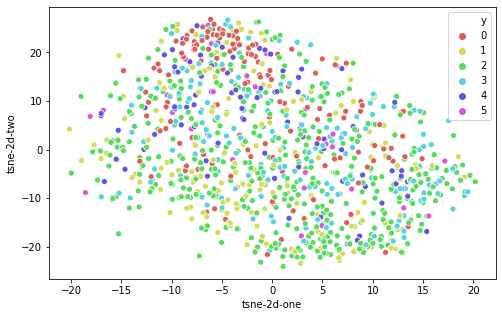

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full"
)

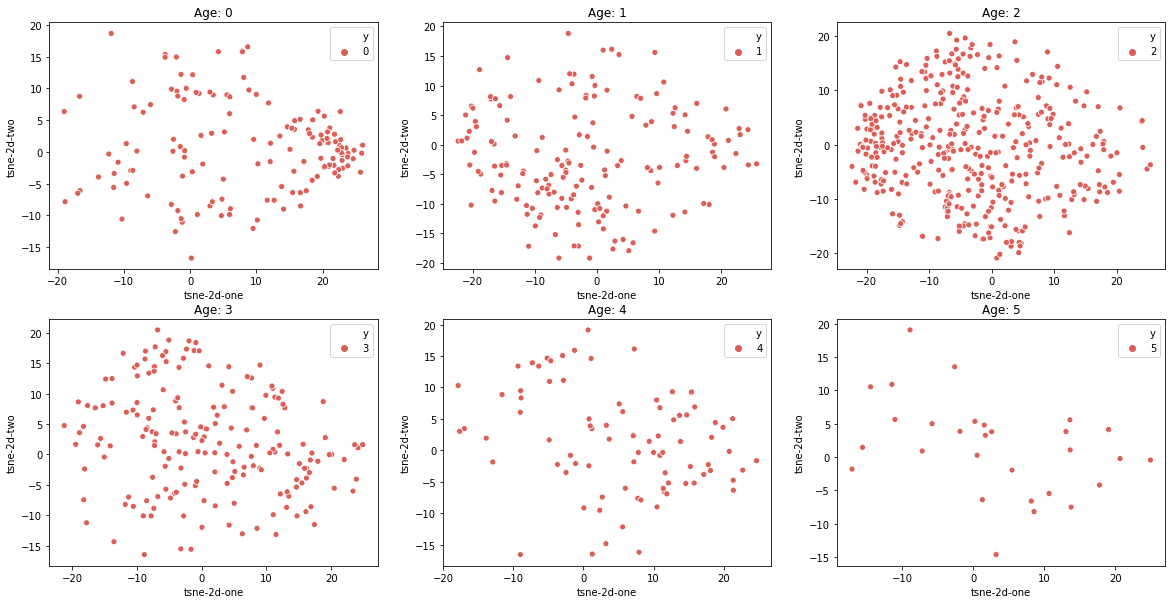

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = plt.subplot(2, 3, i+1, title = "Age: {}".format(str(i)))
    sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 1),
    data=df_subset[df_subset['y'] == i],
    legend="full")
plt.show()

# EDA Gender



## Data prep

In [ ]:
s1, s2, s3, s4 = x_train_img.shape
x_t = x_train_img.reshape(s1, s2*s3*s4)

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(x_t.shape[1]) ]
df = pd.DataFrame(x_t, columns=feat_cols)
df['y'] = y_train_gen
df['label'] = df['y'].apply(lambda i: str(i))
#X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (21337, 3074)


In [ ]:
df.head(2)

pixel0    pixel1    pixel2    pixel3  ...  pixel3070  pixel3071  y  label
0  0.196078  0.196078  0.235294  0.215686  ...   0.639216   0.666667  0      0
1  0.337255  0.282353  0.247059  0.482353  ...   0.670588   0.596078  0      0

[2 rows x 3074 columns]

In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

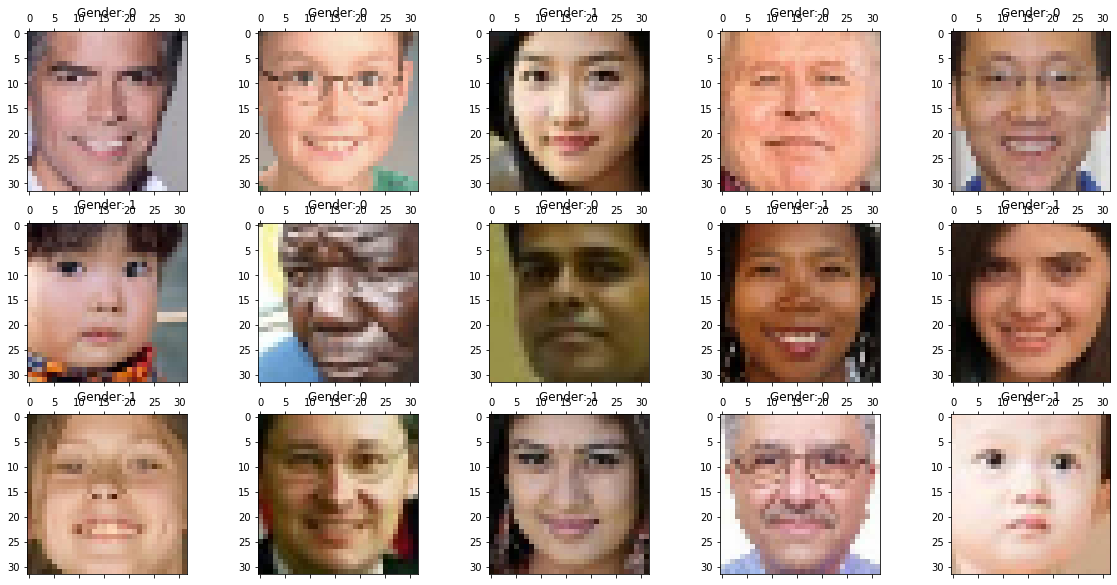

In [ ]:

fig = plt.figure( figsize=(20,10) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1, title = "Gender: {}".format(str(df.loc[i,'label'])) )
    ax.matshow(df.loc[i,feat_cols].values.reshape((32,32,3)).astype(float))

plt.show()

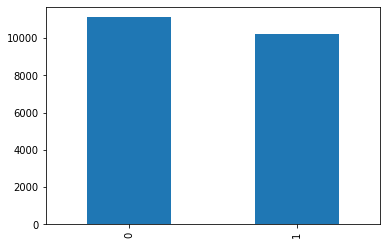

In [ ]:
df['y'].value_counts().plot(kind='bar')

## Correlation Matrix


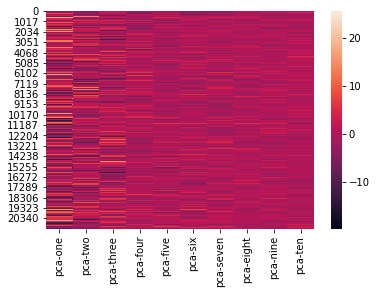

In [ ]:
heat_map = sns.heatmap(df[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five', 'pca-six', 'pca-seven', 'pca-eight', 'pca-nine', 'pca-ten']])
plt.show()

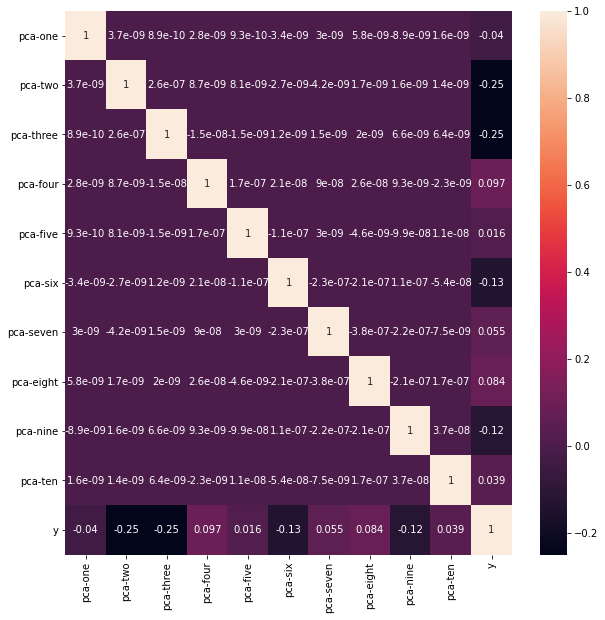

In [ ]:
corr_Mat = df[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five', 'pca-six', 'pca-seven', 'pca-eight', 'pca-nine', 'pca-ten', 'y']].corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_Mat, annot=True, ax= ax)

In [ ]:
pixels_list = list(df.columns)[:-11]
print(pixels_list)

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91

In [ ]:
corr_Mat = df[:5][pixels_list].corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_Mat, annot=True, ax= ax)

In [ ]:
df[:5][pixels_list]

pixel0    pixel1    pixel2    pixel3  ...  pixel3069  pixel3070  pixel3071  y
0  0.196078  0.196078  0.235294  0.215686  ...   0.650980   0.639216   0.666667  3
1  0.337255  0.282353  0.247059  0.482353  ...   0.447059   0.670588   0.596078  0
2  0.137255  0.141176  0.156863  0.145098  ...   0.050980   0.031373   0.015686  1
3  0.811765  0.674510  0.549020  0.764706  ...   0.580392   0.541176   0.501961  5
4  0.156863  0.109804  0.117647  0.152941  ...   0.886275   0.886275   0.878431  2

[5 rows x 3073 columns]

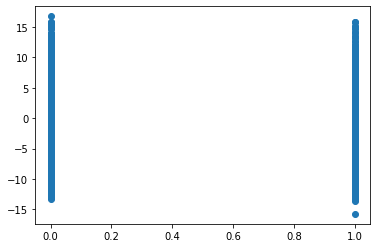

In [ ]:
plt.scatter(df['y'], df['pca-two'])

plt.scatter(df['y'], df['pca-four'])

## PCA

In [ ]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['pca-four'] = pca_result[:,3]
df['pca-five'] = pca_result[:,4]
df['pca-six'] = pca_result[:,5] 
df['pca-seven'] = pca_result[:,6]
df['pca-eight'] = pca_result[:,7]
df['pca-nine'] = pca_result[:,8]
df['pca-ten'] = pca_result[:,9]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.27097276 0.12019272 0.11916896 0.04229324 0.0320618  0.02708485
 0.02566211 0.01929375 0.01621551 0.01568465]


50% of variations are explained by first three PCA components. Hence these components are studied to dig out relationship between artificial pixels (PCA components).

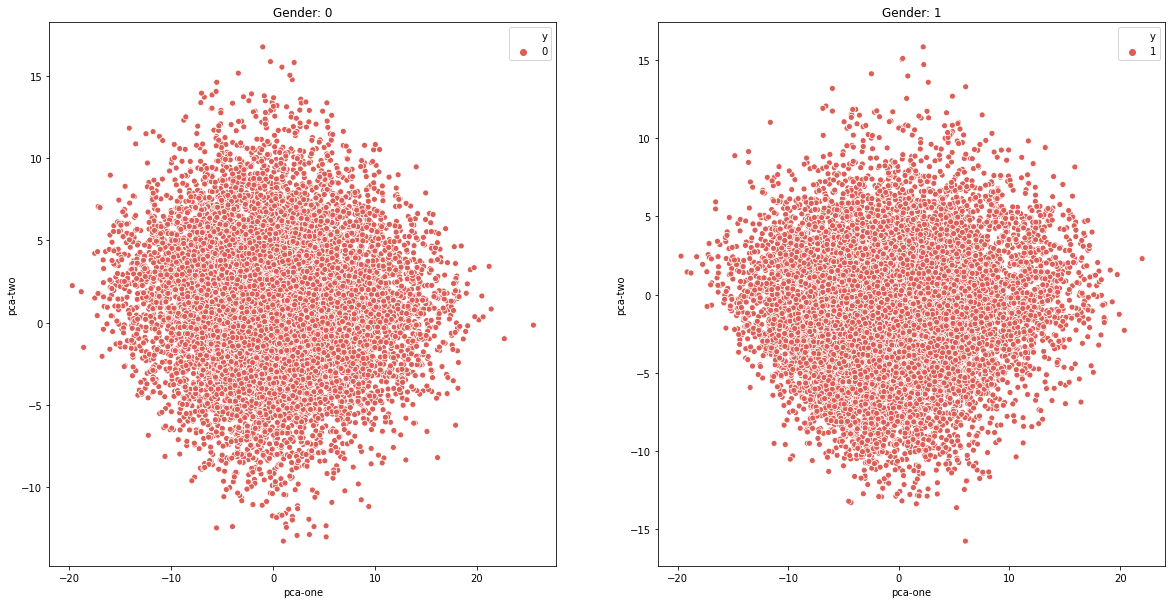

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,2):
    ax = plt.subplot(1, 2, i+1, title = "Gender: {}".format(str(i)))
    sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 1),
    data=df.loc[df[df['y']== i].index,:],
    legend="full", ax = ax)
plt.show()

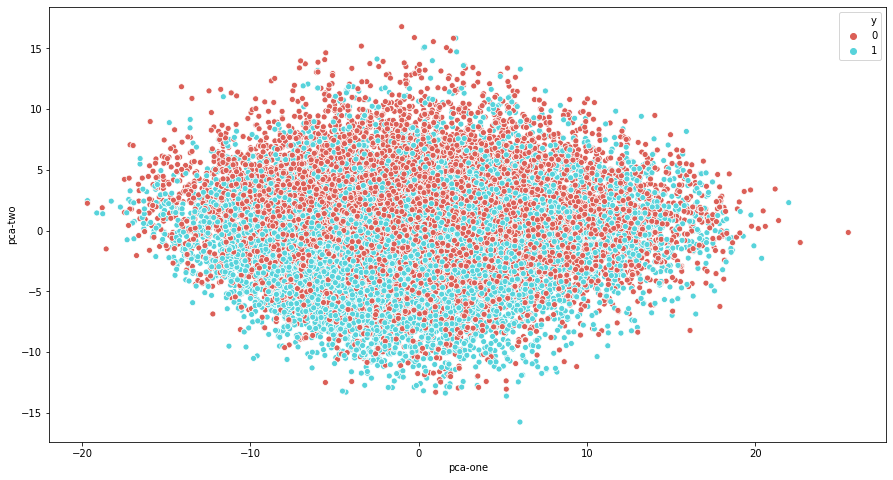

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="pca-one", y="pca-two",
                hue="y",
                palette=sns.color_palette("hls", 2),
                data=df,
                legend="full")
plt.show()

It is clearly seen that the data is densely populated and spreads evenly for all age classses. No significant insight is drawn from the visualization. 

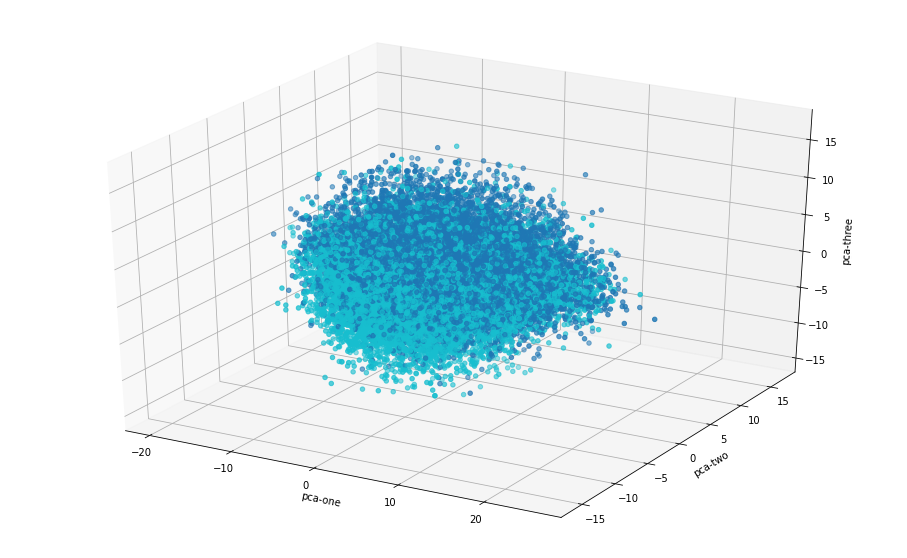

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## t-SNE with PCA



In [ ]:
df_pca_red = df[['pca-one', 'pca-two', 'pca-three', 'y']]
df_pca_red

In [ ]:
N = 1000
df_pca_subset = df_pca_red.loc[:N]
data_pca_subset = df_pca_subset[['pca-one', 'pca-two', 'pca-three']].values

In [ ]:
time_start = time.time()
tsne_pca = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=600)
tsne_pca_results = tsne.fit_transform(data_pca_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1001 samples in 0.001s...
[t-SNE] Computed neighbors for 1001 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1001
[t-SNE] Computed conditional probabilities for sample 1001 / 1001
[t-SNE] Mean sigma: 2.191862
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 65.4724884, gradient norm = 0.2062007 (50 iterations in 0.307s)
[t-SNE] Iteration 100: error = 64.0265427, gradient norm = 0.1754396 (50 iterations in 0.270s)
[t-SNE] Iteration 150: error = 63.7071724, gradient norm = 0.1741955 (50 iterations in 0.245s)
[t-SNE] Iteration 200: error = 63.6763840, gradient norm = 0.1703684 (50 iterations in 0.251s)
[t-SNE] Iteration 250: error = 63.6654243, gradient norm = 0.1697752 (50 iterations in 0.259s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.665424
[t-SNE] Iteration 300: error = 0.9298398, gradient norm = 0.0006931 (50 iterations in 0.222s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


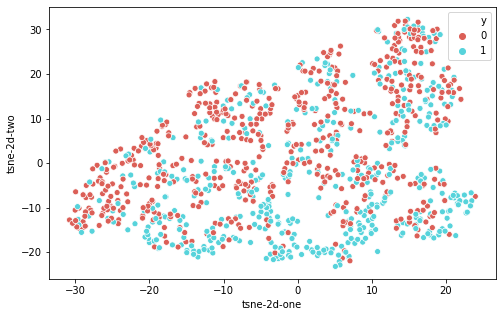

In [ ]:
df_pca_subset['tsne-2d-one'] = tsne_pca_results[:,0]
df_pca_subset['tsne-2d-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_pca_subset,
    legend="full"
)

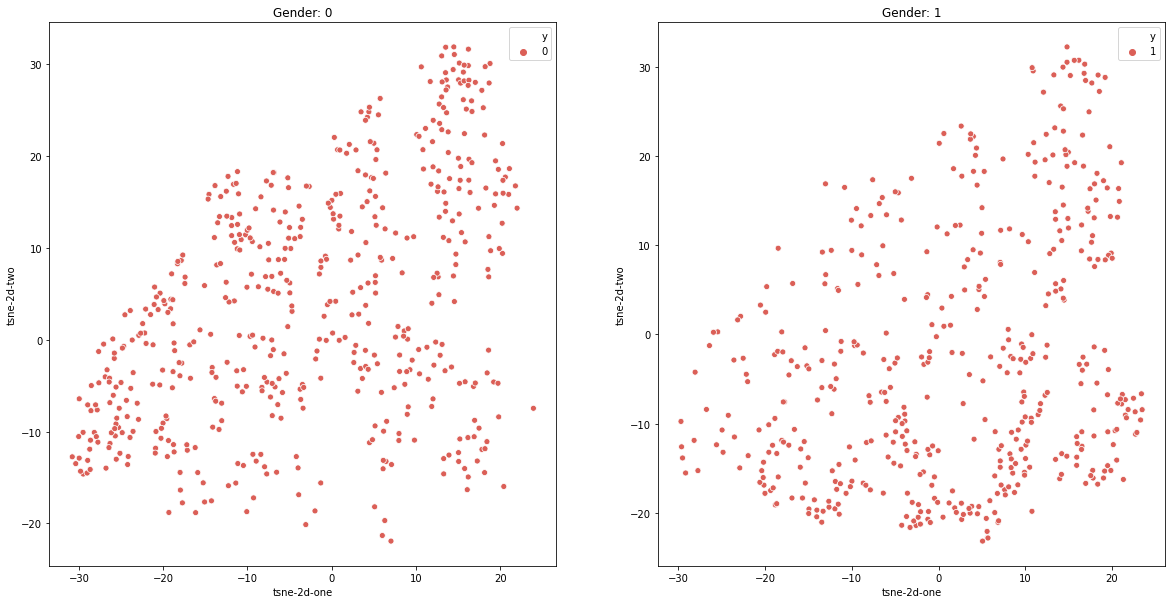

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,2):
    ax = plt.subplot(1, 2, i+1, title = "Gender: {}".format(str(i)))
    sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 1),
    data=df_pca_subset[df_pca_subset['y'] == i],
    legend="full")
plt.show()

## t-SNE without PCA




In [ ]:
N = 1000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.26883203 0.12693572 0.11406685]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=600)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.260s...
[t-SNE] Computed neighbors for 1000 samples in 6.241s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.517180
[t-SNE] Computed conditional probabilities in 0.092s
[t-SNE] Iteration 50: error = 75.8582993, gradient norm = 0.3237966 (50 iterations in 0.324s)
[t-SNE] Iteration 100: error = 76.9404907, gradient norm = 0.2948534 (50 iterations in 0.338s)
[t-SNE] Iteration 150: error = 79.2460098, gradient norm = 0.2739736 (50 iterations in 0.338s)
[t-SNE] Iteration 200: error = 79.1131744, gradient norm = 0.2790166 (50 iterations in 0.354s)
[t-SNE] Iteration 250: error = 76.7609100, gradient norm = 0.3197513 (50 iterations in 0.336s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.760910
[t-SNE] Iteration 300: error = 1.6469119, gradient norm = 0.0029878 (50 iterations in 0.300s)
[t-SNE] Iteration 350: error = 1.5068123, gradient norm = 0.0009

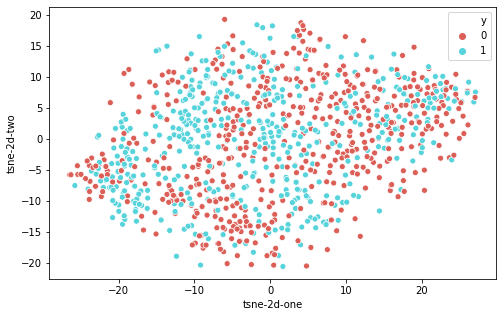

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full"
)

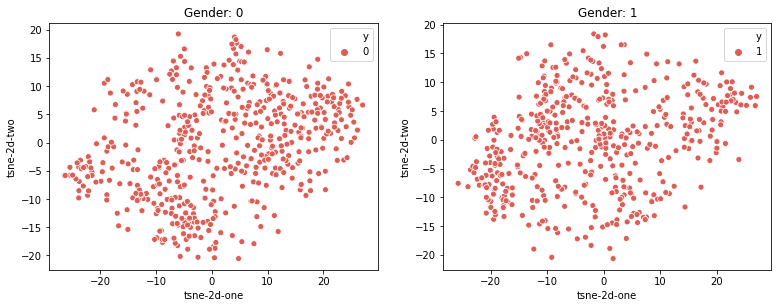

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,2):
    ax = plt.subplot(2, 3, i+1, title = "Gender: {}".format(str(i)))
    sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 1),
    data=df_subset[df_subset['y'] == i],
    legend="full")
plt.show()

# Classification


In [ ]:
import tensorflow as tf
from tensorflow.python.platform import gfile
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import pickle
import collections
import itertools
import time
import os
import re

In [ ]:
##This block is only for access of files using google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded_faces = drive.CreateFile({'id':"13GOTW8onsRzSNwzYQocShOJS3GUrAw1t"})   # replace the id with id of file you want to access
downloaded_faces.GetContentFile('faces_old.npy')  

downloaded_age = drive.CreateFile({'id':"1hBw-E3h9h-WxIhHnchhQnzRwdb9QIWuQ"})   # replace the id with id of file you want to access
downloaded_age.GetContentFile('age_old.npy')  

downloaded_gen = drive.CreateFile({'id':"1uXAJopGkR_3pXqTZ6_Fi2JyjCHWNanCB"})   # replace the id with id of file you want to access
downloaded_gen.GetContentFile('gen_old.npy')  

In [ ]:
faces = np.load('faces_old.npy')
age = np.load('age_old.npy')
gen = np.load('gen_old.npy')

In [ ]:
x_train_img = faces[:round(0.9 * len(faces))]
x_test_img  = faces[round(0.9 * len(faces)):]

s1, s2, s3, s4 = x_train_img.shape
t1, t2, t3, t4 = x_test_img.shape
x_train_vec = x_train_img.reshape(s1, s2 * s3 * s4)
x_test_vec  = x_test_img.reshape(t1, t2 * t3 * t4)

y_train_age = age[:round(0.9 * len(age))]
y_train_gen = gen[:round(0.9 * len(age))]

y_test_age = age[round(0.9 * len(age)):]
y_test_gen = gen[round(0.9 * len(gen)):]

In [ ]:
x_train_img.shape

(21337, 32, 32, 3)

86


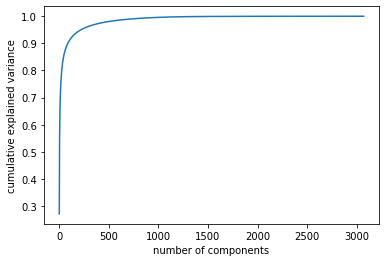

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(x_train_vec)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

for i in range(len(np.cumsum(pca.explained_variance_ratio_))):
  if np.cumsum(pca.explained_variance_ratio_)[i] > 0.9:
    break

print(i)

In [ ]:
# Use 90 features to get 90% data

In [ ]:
pca = PCA(n_components=90)
x_pca_train = pca.fit_transform(x_train_vec)
x_pca_test  = pca.fit_transform(x_test_vec)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, matrix_title):
    """confusion matrix computation and display"""
    plt.figure(figsize=(5, 5), dpi=100)

    # use sklearn confusion matrix
    cm_array = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm_array, annot=True,cmap=plt.cm.Blues)
    #plt.imshow(cm_array[:-1, :-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(matrix_title, fontsize=16)

    #cbar = plt.colorbar(fraction=0.046, pad=0.04)
    #cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)

    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))

    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks, pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()

    plt.show()

In [ ]:
# Classifier performance
def run_classifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
    """run chosen classifier and display results"""
    start_time = time.time()
    clfr.fit(x_train_data, y_train_data)
    y_pred = clfr.predict(x_test_data)
    print("Time taken: %f seconds" % (time.time() - start_time))

    # confusion matrix computation and display
    print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
    plot_confusion_matrix(y_test_data, y_pred, matrix_header_str)

#Age Classifier

Support Vector Machine starting ...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Time taken: 69.776204 seconds
SVM Accuracy: 27.7%


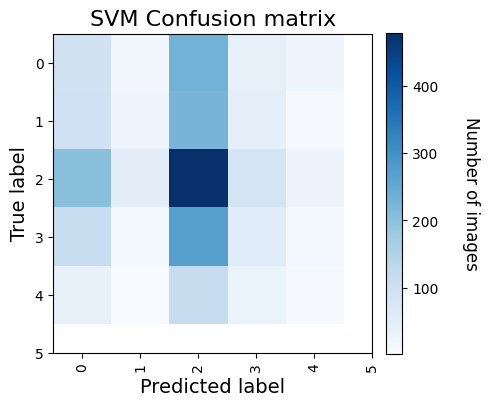

In [ ]:
# LinearSVC defaults:
# penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True,
# intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000

# classify the images with a Linear Support Vector Machine (SVM)
print('Support Vector Machine starting ...')
clf = LinearSVC()
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Extra Trees Classifier starting ...
Time taken: 6.465819 seconds
ET Accuracy: 31.7%


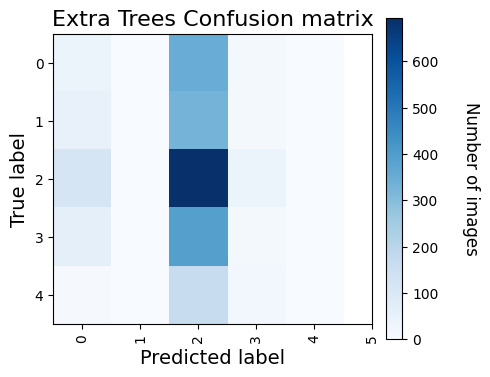

In [ ]:
# RandomForestClassifier/ExtraTreesClassifier defaults:
# (n_estimators=10, criterion='gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0,
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,
# class_weight=None)

# classify the images with a Extra Trees Classifier
print('Extra Trees Classifier starting ...')
clf = ExtraTreesClassifier(n_jobs=4,  n_estimators=100, criterion='gini', min_samples_split=10,
                           max_features=50, max_depth=40, min_samples_leaf=4)
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "ET Accuracy: {0:0.1f}%", "Extra Trees Confusion matrix")

Random Forest Classifier starting ...
Time taken: 18.978623 seconds
RF Accuracy: 33.2%


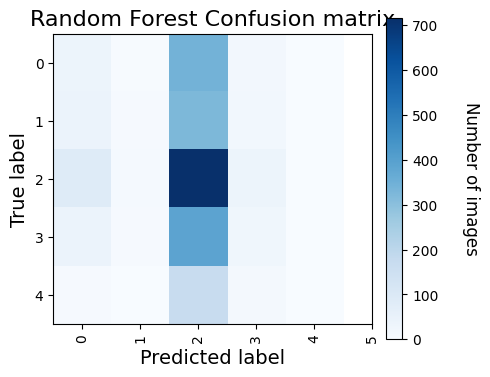

In [ ]:
# classify the images with a Random Forest Classifier
print('Random Forest Classifier starting ...')
clf = RandomForestClassifier(n_jobs=4, criterion='entropy', n_estimators=70, min_samples_split=5)
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "RF Accuracy: {0:0.1f}%", "Random Forest Confusion matrix")

K-Nearest Neighbours Classifier starting ...
Time taken: 4.195053 seconds
KNN Accuracy: 27.4%


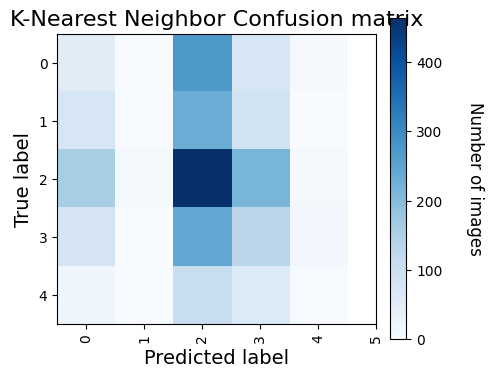

In [ ]:
# KNeighborsClassifier defaults:
# n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None,
# n_jobs=1, **kwargs

# classify the images with a k-Nearest Neighbors Classifier
print('K-Nearest Neighbours Classifier starting ...')
clf = KNeighborsClassifier(n_neighbors=90, n_jobs=4)
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "KNN Accuracy: {0:0.1f}%",
               "K-Nearest Neighbor Confusion matrix")

Multi-layer Perceptron Classifier starting ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


41.313741 seconds
CNN-MLP Accuracy: 26.4%


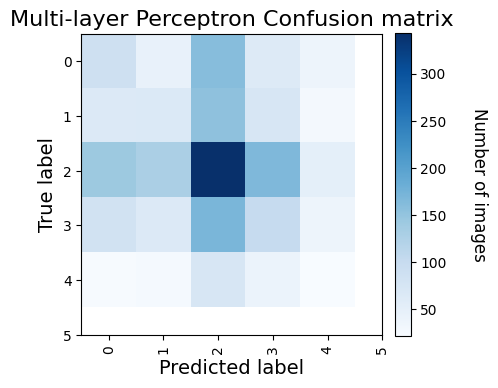

In [ ]:
# MPLClassifier defaults:
# hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’,
# learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None,
# tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
# validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08

# classify the image with a Multi-layer Perceptron Classifier
print('Multi-layer Perceptron Classifier starting ...')
clf = MLPClassifier()
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "MLP Accuracy: {0:0.1f}%",
               "Multi-layer Perceptron Confusion matrix")

Gaussian Naive Bayes Classifier starting ...
0.032353 seconds
CNN-GNB Accuracy: 26.7%


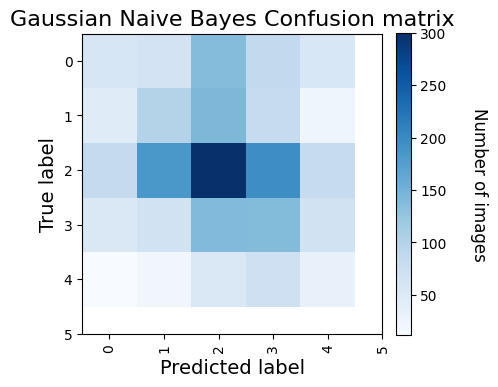

In [ ]:
# GaussianNB defaults:
# priors=None

# classify the images with a Gaussian Naive Bayes Classifier
print('Gaussian Naive Bayes Classifier starting ...')
clf = GaussianNB()
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "GNB Accuracy: {0:0.1f}%",
               "Gaussian Naive Bayes Confusion matrix")

Linear Discriminant Analysis Classifier starting ...
Time taken: 0.334087 seconds
CNN-LDA Accuracy: 28.0%


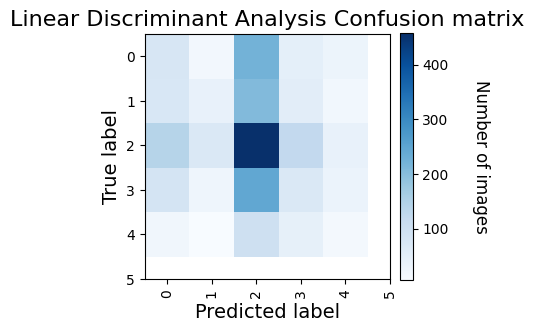

In [ ]:
# LinearDiscriminantAnalysis defaults:
# solver=’svd’, shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001

# classify the images with a Quadratic Discriminant Analysis Classifier
print('Linear Discriminant Analysis Classifier starting ...')
clf = LinearDiscriminantAnalysis()
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "LDA Accuracy: {0:0.1f}%",
               "Linear Discriminant Analysis Confusion matrix")

Quadratic Discriminant Analysis Classifier starting ...
0.165494 seconds
CNN-QDA Accuracy: 28.3%


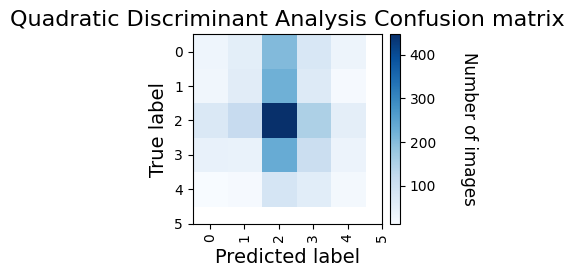

In [ ]:
# QuadraticDiscriminantAnalysis defaults:
# priors=None, reg_param=0.0, store_covariance=False, tol=0.0001, store_covariances=None

# classify the images with a Quadratic Discriminant Analysis Classifier
print('Quadratic Discriminant Analysis Classifier starting ...')
clf = QuadraticDiscriminantAnalysis()
run_classifier(clf, x_pca_train, y_train_age, x_pca_test, y_test_age, "QDA Accuracy: {0:0.1f}%",
               "Quadratic Discriminant Analysis Confusion matrix")

#Gender Classifier

Support Vector Machine starting ...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Time taken: 6.665602 seconds
CNN-SVM Accuracy: 56.6%


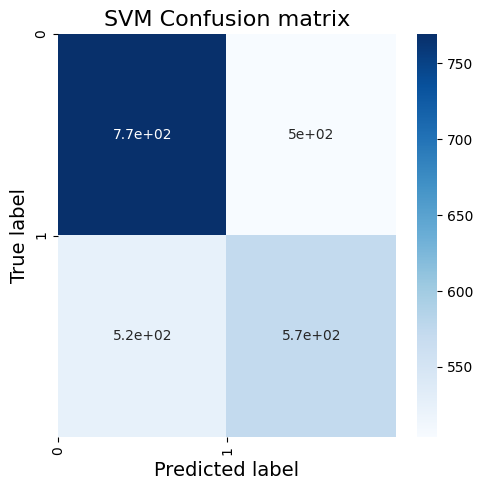

In [ ]:
# LinearSVC defaults:
# penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True,
# intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000

# classify the images with a Linear Support Vector Machine (SVM)
print('Support Vector Machine starting ...')
clf = LinearSVC()
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Extra Trees Classifier starting ...
Time taken: 5.761339 seconds
CNN-ET Accuracy: 57.1%


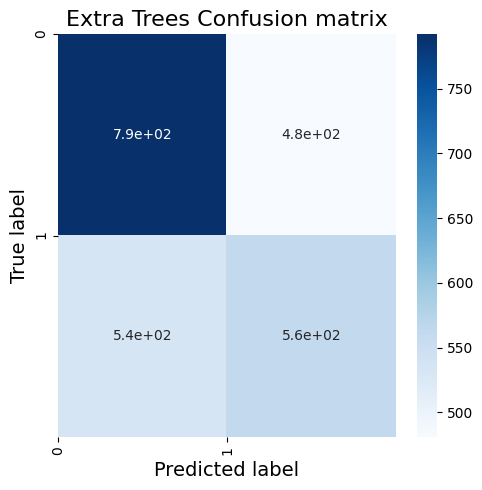

In [ ]:
# RandomForestClassifier/ExtraTreesClassifier defaults:
# (n_estimators=10, criterion='gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0,
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,
# class_weight=None)

# classify the images with a Extra Trees Classifier
print('Extra Trees Classifier starting ...')
clf = ExtraTreesClassifier(n_jobs=4,  n_estimators=100, criterion='gini', min_samples_split=10,
                           max_features=50, max_depth=40, min_samples_leaf=4)
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-ET Accuracy: {0:0.1f}%", "Extra Trees Confusion matrix")

Random Forest Classifier starting ...
Time taken: 9.358519 seconds
CNN-RF Accuracy: 56.8%


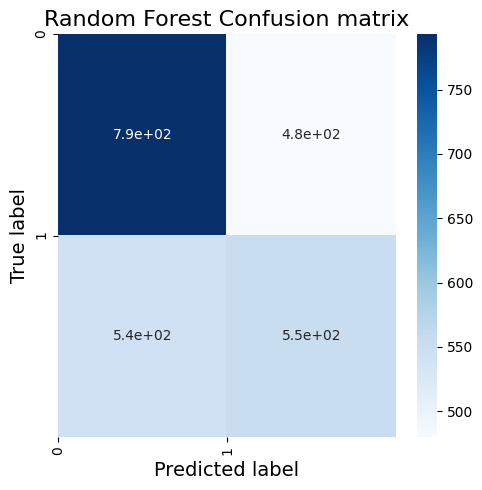

In [ ]:
# classify the images with a Random Forest Classifier
print('Random Forest Classifier starting ...')
clf = RandomForestClassifier(n_jobs=4, criterion='entropy', n_estimators=70, min_samples_split=5)
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-RF Accuracy: {0:0.1f}%", "Random Forest Confusion matrix")

K-Nearest Neighbours Classifier starting ...
Time taken: 3.411080 seconds
CNN-KNN Accuracy: 61.3%


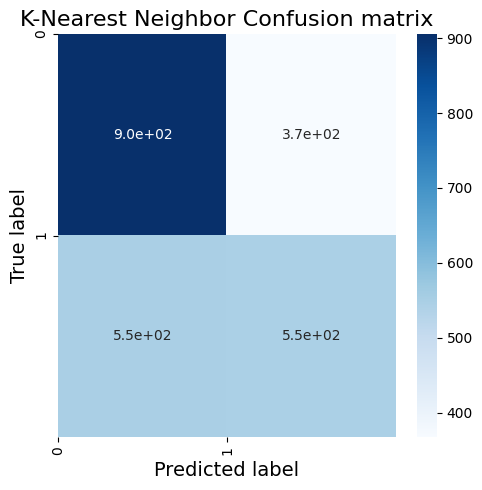

In [ ]:
# KNeighborsClassifier defaults:
# n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None,
# n_jobs=1, **kwargs

# classify the images with a k-Nearest Neighbors Classifier
print('K-Nearest Neighbours Classifier starting ...')
clf = KNeighborsClassifier(n_neighbors=90, n_jobs=4)
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-KNN Accuracy: {0:0.1f}%",
               "K-Nearest Neighbor Confusion matrix")

Multi-layer Perceptron Classifier starting ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Time taken: 37.806824 seconds
CNN-MLP Accuracy: 55.9%


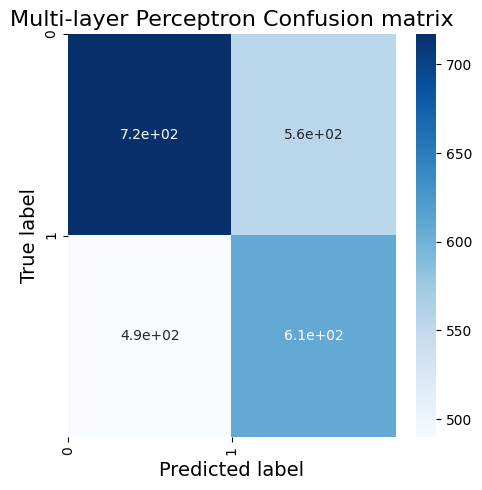

In [ ]:
# MPLClassifier defaults:
# hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’,
# learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None,
# tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
# validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08

# classify the image with a Multi-layer Perceptron Classifier
print('Multi-layer Perceptron Classifier starting ...')
clf = MLPClassifier()
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-MLP Accuracy: {0:0.1f}%",
               "Multi-layer Perceptron Confusion matrix")

Gaussian Naive Bayes Classifier starting ...
Time taken: 0.022768 seconds
CNN-GNB Accuracy: 59.3%


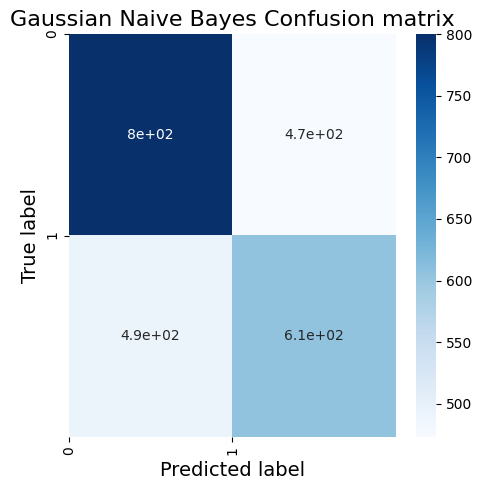

In [ ]:
# GaussianNB defaults:
# priors=None

# classify the images with a Gaussian Naive Bayes Classifier
print('Gaussian Naive Bayes Classifier starting ...')
clf = GaussianNB()
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-GNB Accuracy: {0:0.1f}%",
               "Gaussian Naive Bayes Confusion matrix")

Linear Discriminant Analysis Classifier starting ...
Time taken: 0.382331 seconds
CNN-LDA Accuracy: 56.4%


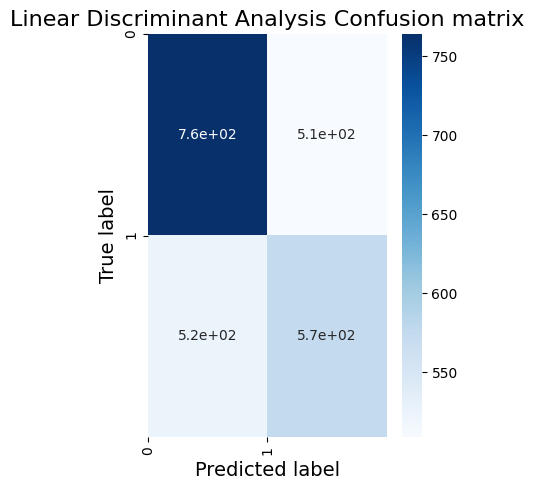

In [ ]:
# LinearDiscriminantAnalysis defaults:
# solver=’svd’, shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001

# classify the images with a Quadratic Discriminant Analysis Classifier
print('Linear Discriminant Analysis Classifier starting ...')
clf = LinearDiscriminantAnalysis()
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-LDA Accuracy: {0:0.1f}%",
               "Linear Discriminant Analysis Confusion matrix")

Quadratic Discriminant Analysis Classifier starting ...
Time taken: 0.168736 seconds
CNN-QDA Accuracy: 54.4%


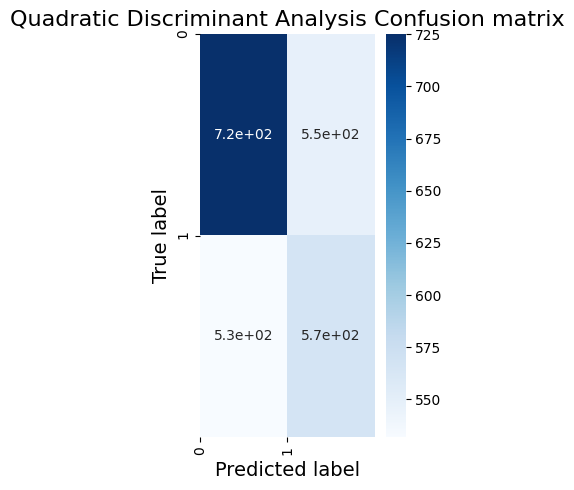

In [ ]:
# QuadraticDiscriminantAnalysis defaults:
# priors=None, reg_param=0.0, store_covariance=False, tol=0.0001, store_covariances=None

# classify the images with a Quadratic Discriminant Analysis Classifier
print('Quadratic Discriminant Analysis Classifier starting ...')
clf = QuadraticDiscriminantAnalysis()
run_classifier(clf, x_pca_train, y_train_gen, x_pca_test, y_test_gen, "CNN-QDA Accuracy: {0:0.1f}%",
               "Quadratic Discriminant Analysis Confusion matrix")